<a href="https://colab.research.google.com/github/SathyaSudha-96/Deep-Leraning-2021-22/blob/main/IDL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sathya Sudha Murugan(229638)

In [1]:
!pip install tensorflow==2.0

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(tf. __version__)

2.0.0


In [4]:
class MNISTDataset:
    """'Bare minimum' class to wrap MNIST numpy arrays into a dataset."""
    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,
                 to01=True, shuffle=True, seed=None):
        """
        Use seed optionally to always get the same shuffling (-> reproducible
        results).
        """
        self.batch_size = batch_size
        self.train_data = train_imgs
        self.train_labels = train_lbs.astype(np.int32)
        self.test_data = test_imgs
        self.test_labels = test_lbls.astype(np.int32)

        if to01:
            # int in [0, 255] -> float in [0, 1]
            self.train_data = self.train_data.astype(np.float32) / 255
            self.test_data = self.test_data.astype(np.float32) / 255

        self.size = self.train_data.shape[0]

        if seed:
            np.random.seed(seed)
        if shuffle:
            self.shuffle_train()
        self.shuffle = shuffle
        self.current_pos = 0

    def next_batch(self):
        """Either gets the next batch, or optionally shuffles and starts a
        new epoch."""
        end_pos = self.current_pos + self.batch_size
        if end_pos < self.size:
            batch = (self.train_data[self.current_pos:end_pos],
                     self.train_labels[self.current_pos:end_pos])
            self.current_pos += self.batch_size
        else:
            # we return what's left (-> possibly smaller batch!) and prepare
            # the start of a new epoch
            batch = (self.train_data[self.current_pos:self.size],
                     self.train_labels[self.current_pos:self.size])
            if self.shuffle:
                self.shuffle_train()
            self.current_pos = 0
            print("Starting new epoch...")
        return batch

    def shuffle_train(self):
        shuffled_inds = np.arange(self.train_data.shape[0])
        np.random.shuffle(shuffled_inds)
        self.train_data = self.train_data[shuffled_inds]
        self.train_labels = self.train_labels[shuffled_inds]


In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print('Shape of Training Images',train_images.shape)
print('Shape of Training Labels',train_labels.shape)
print('Shape of Testing Images',test_images.shape)
print('Shape of Testing Labels',test_labels.shape)

Shape of Training Images (60000, 28, 28)
Shape of Training Labels (60000,)
Shape of Testing Images (10000, 28, 28)
Shape of Testing Labels (10000,)


5


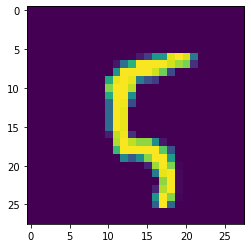

In [7]:
print(train_labels[100])
plt.imshow(train_images[100])

In [8]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [9]:
#Initializing Weights and Biases
w1 = tf.Variable(tf.random.normal([784, 256], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b1 = tf.Variable(tf.random.normal([256,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44)) 
w2 = tf.Variable(tf.random.normal([256,128], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b2 = tf.Variable(tf.random.normal([128,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))  
w3 = tf.Variable(tf.random.normal([128,10], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b3 = tf.Variable(tf.random.normal([10,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
#w4 = tf.Variable(tf.random.normal([64,10], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
#b4 = tf.Variable(tf.random.normal([10,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))

In [10]:
#Training
epochs = 3000
learning_rate = 0.1
tanh_loss = []
tanh_accuracy = []
step = []
for epoch in range(epochs):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent= True) as tape:
        hidden_Layer1 = tf.nn.tanh(tf.matmul(img_batch, w1) + b1)
        hidden_Layer2 = tf.nn.tanh(tf.matmul(hidden_Layer1, w2) + b2)
        #hidden_Layer3 = tf.nn.tanh(tf.matmul(hidden_Layer2, w3) + b3)
        logits = tf.matmul(hidden_Layer2, w3) + b3
        current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads1 = tape.gradient(current_Loss, [w1, b1])
    grads2 = tape.gradient(current_Loss, [w2, b2])
    grads3 = tape.gradient(current_Loss, [w3, b3])
    #grads4 = tape.gradient(current_Loss, [w4,b4])
    w1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    w2.assign_sub(learning_rate  * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])
    w3.assign_sub(learning_rate  * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])
    #w4.assign_sub(learning_rate  * grads4[0])
    #b4.assign_sub(learning_rate * grads4[1])

    
    if not epoch % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        step.append(epoch+100)
        tanh_loss.append(current_Loss)
        tanh_accuracy.append(acc)
        print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 17.383068084716797 Accuracy: 0.09375
Loss: 3.4487266540527344 Accuracy: 0.546875
Loss: 2.5609078407287598 Accuracy: 0.671875
Loss: 1.38130784034729 Accuracy: 0.828125
Loss: 1.68168306350708 Accuracy: 0.7421875
Starting new epoch...
Loss: 1.9017690420150757 Accuracy: 0.7265625
Loss: 1.7373988628387451 Accuracy: 0.75
Loss: 1.501988410949707 Accuracy: 0.75
Loss: 1.0802638530731201 Accuracy: 0.78125
Loss: 1.0052342414855957 Accuracy: 0.8359375
Starting new epoch...
Loss: 0.735181450843811 Accuracy: 0.8515625
Loss: 1.0244550704956055 Accuracy: 0.8125
Loss: 0.6156660318374634 Accuracy: 0.8203125
Loss: 0.7803630232810974 Accuracy: 0.8671875
Loss: 0.7293034195899963 Accuracy: 0.8359375
Starting new epoch...
Loss: 0.635130763053894 Accuracy: 0.890625
Loss: 0.7152343988418579 Accuracy: 0.875
Loss: 0.9804427027702332 Accuracy: 0.8203125
Loss: 0.4834998846054077 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.8084195852279663 Accuracy: 0.8515625
Loss: 0.555001974105835 Accuracy: 0.8515625


In [11]:
#Validation/testing
hid_Layer1 = tf.nn.tanh(tf.matmul(data.test_data, w1) + b1)
hid_Layer2 = tf.nn.tanh(tf.matmul(hid_Layer1, w2) + b2)
#hid_Layer3 = tf.nn.tanh(tf.matmul(hid_Layer2, w3) + b3)
logit = tf.matmul(hid_Layer2, w3) + b3
current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit, labels=data.test_labels))
preds = tf.argmax(logit, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, data.test_labels), tf.float32))
print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 0.6973135471343994 Accuracy: 0.8496999740600586


In [12]:
w1 = tf.Variable(tf.random.normal([784, 256], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b1 = tf.Variable(tf.random.normal([256,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44)) 
w2 = tf.Variable(tf.random.normal([256,128], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b2 = tf.Variable(tf.random.normal([128,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))  
w3 = tf.Variable(tf.random.normal([128,10], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
b3 = tf.Variable(tf.random.normal([10,], mean = 0.0, stddev = 1.0, dtype=tf.dtypes.float32, seed=44))
#Training
training_steps = 3000
learning_rate = 0.1
sigmoid_loss = []
sigmoid_accuracy = []
for steps in range(training_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent= True) as tape:
        hidden_Layer1 = tf.nn.sigmoid(tf.matmul(img_batch, w1) + b1)
        hidden_Layer2 = tf.nn.sigmoid(tf.matmul(hidden_Layer1, w2) + b2)
        #hidden_Layer3 = tf.nn.tanh(tf.matmul(hidden_Layer2, w3) + b3)
        logits = tf.matmul(hidden_Layer2, w3) + b3
        current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads1 = tape.gradient(current_Loss, [w1, b1])
    grads2 = tape.gradient(current_Loss, [w2, b2])
    grads3 = tape.gradient(current_Loss, [w3, b3])
    #grads4 = tape.gradient(current_Loss, [w4,b4])
    w1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    w2.assign_sub(learning_rate  * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])
    w3.assign_sub(learning_rate  * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])
    #w4.assign_sub(learning_rate  * grads4[0])
    #b4.assign_sub(learning_rate * grads4[1])

    
    if not steps % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        sigmoid_loss.append(current_Loss)
        sigmoid_accuracy.append(acc)
        print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 19.051172256469727 Accuracy: 0.09375
Loss: 1.960555076599121 Accuracy: 0.4375
Loss: 1.6695139408111572 Accuracy: 0.5234375
Starting new epoch...
Loss: 1.2387759685516357 Accuracy: 0.53125
Loss: 0.9213389754295349 Accuracy: 0.71875
Loss: 1.028578519821167 Accuracy: 0.6953125
Loss: 1.1044540405273438 Accuracy: 0.6640625
Loss: 0.9699268937110901 Accuracy: 0.6796875
Starting new epoch...
Loss: 0.6852459907531738 Accuracy: 0.7421875
Loss: 0.5591585636138916 Accuracy: 0.8203125
Loss: 0.8145578503608704 Accuracy: 0.734375
Loss: 0.6801448464393616 Accuracy: 0.8125
Loss: 0.6218417882919312 Accuracy: 0.8515625
Starting new epoch...
Loss: 0.6279565095901489 Accuracy: 0.8046875
Loss: 0.6141325235366821 Accuracy: 0.8046875
Loss: 0.6079722046852112 Accuracy: 0.8203125
Loss: 0.550745964050293 Accuracy: 0.8046875
Starting new epoch...
Loss: 0.4976244568824768 Accuracy: 0.8515625
Loss: 0.6036452054977417 Accuracy: 0.828125
Loss: 0.6170604228973389 Accuracy: 0.7734375
Loss: 0.7410227060317993 Accu

In [13]:
#Validation/testing
hid_Layer1 = tf.nn.sigmoid(tf.matmul(data.test_data, w1) + b1)
hid_Layer2 = tf.nn.sigmoid(tf.matmul(hid_Layer1, w2) + b2)
#hid_Layer3 = tf.nn.tanh(tf.matmul(hid_Layer2, w3) + b3)
logit = tf.matmul(hid_Layer2, w3) + b3
current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit, labels=data.test_labels))
preds = tf.argmax(logit, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, data.test_labels), tf.float32))
print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 0.47185176610946655 Accuracy: 0.855400025844574


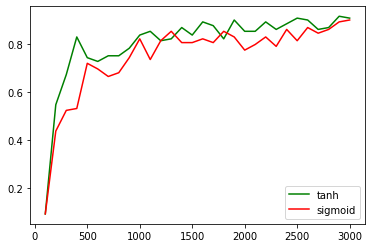

In [14]:
plt.plot(step, tanh_accuracy, "g", label = "tanh")
plt.plot(step,sigmoid_accuracy,"r", label = "sigmoid")
plt.legend()
plt.show()

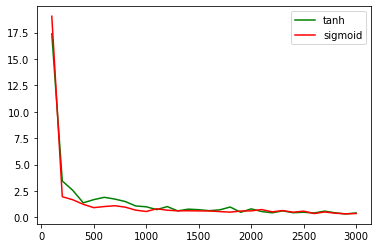

In [15]:
plt.plot(step,tanh_loss,"g", label = 'tanh')
plt.plot(step,sigmoid_loss,"r", label = 'sigmoid')
plt.legend()
plt.show()

Bonus Task(Fashion MNIST)

---



In [16]:
Fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = Fashion_mnist.load_data()
Fashion_data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

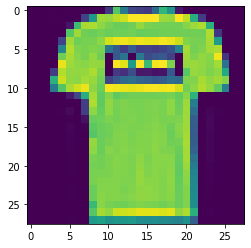

In [17]:
plt.imshow(train_images[1])

In [18]:
epochs = 3000
learning_rate = 0.1
loss = []
accuracy = []
step = []
for epoch in range(epochs):
    img_batch, lbl_batch = Fashion_data.next_batch()
    with tf.GradientTape(persistent= True) as tape:
        hidden_Layer1 = tf.nn.tanh(tf.matmul(img_batch, w1) + b1)
        hidden_Layer2 = tf.nn.tanh(tf.matmul(hidden_Layer1, w2) + b2)
        #hidden_Layer3 = tf.nn.tanh(tf.matmul(hidden_Layer2, w3) + b3)
        logits = tf.matmul(hidden_Layer2, w3) + b3
        current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads1 = tape.gradient(current_Loss, [w1, b1])
    grads2 = tape.gradient(current_Loss, [w2, b2])
    grads3 = tape.gradient(current_Loss, [w3, b3])
    #grads4 = tape.gradient(current_Loss, [w4,b4])
    w1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    w2.assign_sub(learning_rate  * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])
    w3.assign_sub(learning_rate  * grads3[0])
    b3.assign_sub(learning_rate * grads3[1])
    #w4.assign_sub(learning_rate  * grads4[0])
    #b4.assign_sub(learning_rate * grads4[1])

    
    if not epoch % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        step.append(epoch+100)
        loss.append(current_Loss)
        accuracy.append(acc)
        print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 18.752897262573242 Accuracy: 0.109375
Loss: 2.5808753967285156 Accuracy: 0.5078125
Loss: 1.749826431274414 Accuracy: 0.6328125
Loss: 1.2791460752487183 Accuracy: 0.7109375
Loss: 1.5603142976760864 Accuracy: 0.6796875
Starting new epoch...
Loss: 0.8918125629425049 Accuracy: 0.7421875
Loss: 1.3391687870025635 Accuracy: 0.671875
Loss: 0.7125522494316101 Accuracy: 0.75
Loss: 0.913415789604187 Accuracy: 0.7109375
Loss: 1.264318585395813 Accuracy: 0.671875
Starting new epoch...
Loss: 0.7840123176574707 Accuracy: 0.703125
Loss: 0.8648769855499268 Accuracy: 0.6875
Loss: 0.5770583152770996 Accuracy: 0.8203125
Loss: 0.8029630184173584 Accuracy: 0.7421875
Loss: 0.9737586379051208 Accuracy: 0.7265625
Starting new epoch...
Loss: 0.5818983912467957 Accuracy: 0.78125
Loss: 0.683556854724884 Accuracy: 0.75
Loss: 0.7620725035667419 Accuracy: 0.765625
Loss: 0.7431833744049072 Accuracy: 0.703125
Starting new epoch...
Loss: 0.8453936576843262 Accuracy: 0.7109375
Loss: 0.7921723127365112 Accuracy: 0.

In [19]:
hid_Layer1 = tf.nn.tanh(tf.matmul(Fashion_data.test_data, w1) + b1)
hid_Layer2 = tf.nn.tanh(tf.matmul(hid_Layer1, w2) + b2)
#hid_Layer3 = tf.nn.tanh(tf.matmul(hid_Layer2, w3) + b3)
logit = tf.matmul(hid_Layer2, w3) + b3
current_Loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit, labels=Fashion_data.test_labels))
preds = tf.argmax(logit, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, Fashion_data.test_labels), tf.float32))
print("Loss: {} Accuracy: {}".format(current_Loss, acc))

Loss: 0.7568938732147217 Accuracy: 0.7576000094413757




> Why Initializing the weights to 0 will not work in MLP? : If we initialize the weights to zero then every hidden unit will also get zero irrespective of the input. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and because of which it affects only the scale of the weight vector, not the direction.

> How changing the parameters and increasing the hidden layer affect the model? 
 Increasing the weights and biases increased the accuracy .


















